Привет!
Надеюсь, ты не против, что мы с тобой будем на "ты". Меня зовут Комиссаров Алексей. Я буду проверять твою работу и помогать тебе в освоении материала. Я буду использовать следующую цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий от ревьюера:</b> Так я отмечаю пункты твоей работы, которые необходимо будет переделать.  </div>

<div class="alert alert-warning">
<b>Комментарий от ревьюера:</b> Так я отмечаю то, что можно было бы улучшить/изменить/учесть или же добавляю пояснения к комментариям другого типа. Необходимости переделывать эти пункты нет, но принять во внимание стоит.</div>

<div class="alert alert-success">
<b>Комментарий от ревьюера:</b> Так я выделяю все остальные комментарии и особо удачные моменты твоей работы.</div><br/>

Разбирать твою работу мы будем в формате диалога, поэтому прошу отвечать на мои комментарии, задавать вопросы, если они возникли, и делать это в отдельном блоке таким цветом, который ты выберешь.<br/><br/>

Прошу тебя не удалять эти комментарии, они нам помогут отследить историю изменений.
<hr style="border: 1px solid #000;">

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

На ценообразование из самых вероятных факторов могли повлиять расстояние до городского центра или важных направлений, близость от угодий, площадь квартиры и количество комнат.

В параметры квартир входят: наличие балкона, количество комнат, этажность, жилая площадь, площадь кухни.

Кроме того, можно предположить, что время выставления объявления, а также то, сколько объявление было доступно на сайте, имеют влияние на спрос.

Какой город(а) "предлагают" больше всего квартир?
Какие факторы имеют большее/меньшее значение на скорость продажи?
Влияет ли расстояние до природных угодий на скорость продажи? До аэропорта?
Влияют ли параметры квартиры на скорость сделки?
Расстояние до городского центра: влияет ли на скорость продажи квартиры? И в какой мере? т.е. всегда ли?
Есть ли периоды времени, когда можно ожидать самые свежие объявления?
Какой год был самым богатым на предложения недвижимости?


**Дополнительная литература** 
- <a href=" https://coderoad.ru/38579532/pandas-%D1%8D%D0%BA%D0%B2%D0%B8%D0%B2%D0%B0%D0%BB%D0%B5%D0%BD%D1%82-np-where">Использование np.where для простановки значений</a> 


<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Ого. Ещё и доп. литература указана.
    
</div>
<hr style="border: 1px solid #000;"> 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
pip install seaborn==0.11.0  #Выдавал ошибку, не хотел делать histplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')
#Взято отсюда https://webtort.ru/%D0%BA%D0%B0%D0%BA-%D0%B2%D1%8B%D0%B2%D0%B5%D1%81%D1%82%D0%B8-%D0%B2%D1%81%D1%8E-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%83-%D0%B2-pandas/
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

<hr style="border: 1px solid #000;"> 

<div class="alert alert-success">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
И тут отсылки на внешние ресурсы. Молодец.
    
</div>
<hr style="border: 1px solid #000;"> 

<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Давай поправим путь.
    


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В данных есть разнородные данные. Есть пропуски, которые будут мешать вычислениям. Есть параметры True/False - нам важно, в частности потому что исследование *квартир*, а не апартаментов. 
Нам понадобится заполнить пробелы, заменить тип данных.

<hr style="border: 1px solid #000;"> 

<div class="alert alert-danger">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Как мы сделали эти выводы, если выше не делали <b>.info()</b>?
    
</div>
<hr style="border: 1px solid #000;"> 
</div>
<hr style="border: 1px solid #000;"> 
<div class="alert alert-success">
<b>Комментарий от ученика:</b> Что-то произошло при перезаписи тетрадки. У меня были и describe, и info.<br/><br/>

<hr style="border: 1px solid #000;">

### Шаг 2. Предобработка данных

In [5]:
#Заполним пробелы в столбцах с булевым типом данных.
data[["parks_around3000", "ponds_around3000"]] = data[["parks_around3000", "ponds_around3000"]].fillna(0)
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21417,17,10450000.0,109.3,2019-02-25T00:00:00,5,3.30,7.0,67.0,6,False,False,False,9.5,NaN,Санкт-Петербург,24823.0,5042.0,1.0,711.0,0.0,NaN,21.0
17066,19,16800000.0,78.8,2018-10-10T00:00:00,2,2.90,9.0,38.8,3,NaN,False,False,18.0,NaN,Санкт-Петербург,20031.0,3232.0,1.0,613.0,1.0,200.0,NaN
14131,7,5050000.0,63.0,2019-01-12T00:00:00,3,2.53,12.0,40.7,3,NaN,False,False,7.1,NaN,Санкт-Петербург,32066.0,12658.0,0.0,NaN,0.0,NaN,108.0


<hr style="border: 1px solid #000;"> 

<div class="alert alert-warning">
<strong><font size=5>Комментарий от ревьюера</font></strong><br/>
 
Очень рекомендую отказываться от <b>inplace=True</b>. Да, можно:
    
</div>
<div class="alert alert-success">
<b>Комментарий от ученика:</b> принято. я так пыталась, но без двойных квадратных скобок. Смысл понят, спасибо.<br/><br/>

<hr style="border: 1px solid #000;">


<hr style="border: 1px solid #000;"> 

In [6]:
#На всякий случай занижаем. for Series - .str.lower()
data['locality_name'].str.lower()
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
814,0,7600000.0,111.0,2017-07-26T00:00:00,3,3.0,16.0,63.0,12,NaN,False,False,14.0,2.0,Санкт-Петербург,24685.0,28109.0,1.0,185.0,2.0,72.0,66.0
5753,16,3100000.0,32.7,2017-02-10T00:00:00,1,NaN,12.0,16.8,1,False,False,False,7.1,2.0,Санкт-Петербург,32230.0,12038.0,0.0,NaN,0.0,NaN,19.0
1028,10,6000000.0,90.0,2016-09-04T00:00:00,3,3.0,5.0,48.9,3,NaN,False,False,15.5,5.0,Красное Село,26190.0,29614.0,0.0,NaN,0.0,NaN,711.0


In [7]:
data[['is_apartment', 'balcony', 'is_apartment']] = data[['is_apartment', 'balcony', 'is_apartment']].fillna(0)
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13695,1,4800000.0,59.0,2018-02-20T00:00:00,2,NaN,6.0,36.0,1,0,False,False,10.00,0.0,Санкт-Петербург,19845.0,3594.0,1.0,350.0,1.0,196.0,56.0
870,11,5890000.0,65.0,2015-11-18T00:00:00,3,2.65,16.0,39.5,1,False,False,False,10.75,0.0,Санкт-Петербург,29236.0,6608.0,1.0,737.0,1.0,1199.0,222.0
14155,8,2650000.0,42.9,2018-10-20T00:00:00,2,2.50,5.0,27.0,3,0,False,False,6.00,0.0,поселок Романовка,NaN,NaN,0.0,NaN,0.0,NaN,192.0


In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst=True)
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6586,6,5950000.0,59.2,2018-01-20,2,NaN,22.0,NaN,7,0,False,False,NaN,0.0,Санкт-Петербург,36231.0,17394.0,0.0,NaN,1.0,870.0,60.0
3423,6,8840000.0,69.5,2019-02-21,2,NaN,19.0,33.0,3,0,False,False,11.7,2.0,Санкт-Петербург,19092.0,4441.0,0.0,NaN,0.0,NaN,18.0
13256,12,2625000.0,44.2,2018-11-22,2,NaN,2.0,27.3,2,0,False,False,5.6,0.0,Всеволожск,NaN,NaN,0.0,NaN,0.0,NaN,10.0


In [9]:
#Третьестепенная задача: если указан парк или озеро, то что делать? Нам дан радиус 3000 метров, поставим как максимальный.
data[['ponds_nearest', 'parks_nearest']] = data[['ponds_nearest', 'parks_nearest']].fillna(3000)

In [10]:
#В вопросах про удалённость от аэпорта ничего нет.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds

In [11]:
#Посмотрим, какие значение у параметра "потолок"
c_height = data['ceiling_height'].unique()
c_height.sort() #Мы увидели, что есть показатели выше 4,5м (а это высокий потолок, встречается в сталинках)
#c_height
c_height_mean = data.query('ceiling_height < 4.5').mean()
c_height_mean #2.72 - среднее значение

total_images           1.031844e+01
last_price             6.786696e+06
total_area             6.175932e+01
rooms                  2.136008e+00
ceiling_height         2.723429e+00
floors_total           1.017970e+01
living_area            3.559216e+01
floor                  5.624697e+00
is_apartment           2.767209e-03
studio                 5.257696e-03
open_plan              9.685230e-04
kitchen_area           1.055493e+01
balcony                6.787271e-01
airports_nearest       2.882226e+04
cityCenters_nearest    1.407726e+04
parks_around3000       5.083362e-01
parks_nearest          2.079548e+03
ponds_around3000       6.167416e-01
ponds_nearest          2.020086e+03
days_exposition        1.904392e+02
dtype: float64

In [12]:
data.loc[(data['ceiling_height'] > 4.5),'ceiling_height'] = 2.72
print('сколько пропусков в параметре "Потолок": ', data['ceiling_height'].isnull().sum())
data['ceiling_height'].fillna(2.72)
data.sample(3)

сколько пропусков в параметре "Потолок":  9195


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7745,0,3870000.0,32.0,2015-01-02,1,NaN,5.0,18.5,3,0,False,False,7.0,0.0,Санкт-Петербург,28809.0,7748.0,2.0,343.0,2.0,439.0,690.0
10726,12,5800000.0,58.9,2019-01-28,2,2.73,4.0,34.9,4,0,False,False,9.9,0.0,Пушкин,19303.0,34157.0,0.0,3000.0,1.0,1099.0,NaN
20798,6,4550000.0,39.0,2019-03-15,1,2.70,16.0,21.0,7,0,False,False,8.7,0.0,Санкт-Петербург,33457.0,14480.0,0.0,3000.0,1.0,269.0,NaN


In [13]:
#Посмотрим, какие значение у параметра "комнаты"
rooms_quant = data['rooms'].unique()
rooms_quant.sort() #Мы увидели, что есть показатели выше 4,5м (а это высокий потолок, встречается в сталинках)
#rooms_quant
data.pivot_table(index='rooms', values=['total_area', 'last_price'],\
                 aggfunc={'total_area': 'min', 'last_price': 'count'})


,last_price,total_area
rooms,,
0,197,15.5
1,8047,12.0
2,7940,20.0
3,5814,40.1
4,1180,42.0
5,326,40.0
6,105,87.0
7,59,100.6
8,12,150.0


In [14]:
#Согласно действующим СНиПам, минимальная 
#площадь комнаты должна быть не менее 8 квадратных метров (п. 5.3 СП 5.413330.2011). Можно было бы добавть автоматическую
#считалку. Но мне пока быстрее просмотреть :(
data[(data['rooms'] == 5) & (data['total_area'] < 48)]
data = data.query("index != 542")

In [15]:
#Посмотрим, какие значение у параметра "кухня"
data['kitchen_area'].unique()

#Площадь спальни и кухни в мансардном этаже (или этаже с наклонными ограждающими конструкциями)
#допускается не менее 7 м2 при условии, что общее жилое помещение имеет площадь не менее 16 м2."
#(СНиП 31-01-2003).
data[(data['total_area'] <=14) & (data['kitchen_area'] <= 5)]


data.pivot_table(index='kitchen_area', values=['total_area', 'last_price'],\
                 aggfunc={'total_area': 'min', 'last_price': 'count'})
#print(list(data.query('kitchen_area < 5 | (kitchen_area <= 5 & living_area <= 16)').index))
#Зато мы не теряем индексы этих строчек. Это фактически выборка объявлений.
data = data.query('index != [76, 259, 298, 422, 556, 906, 1327, 1636, 1834, 1853, 2024, \
2165, 2474, 2484, 2653, 2684, 3078, 3090, 3195, 3356, 3368, 3403, 3704, 4777, 4944, 5193, \
5415, 5455, 5514, 5846, 6002, 6084, 6200, 6262, 6426, 6544, 6755, 6810, 6908, 7047, 7426, \
7436, 7458, 7496, 7950, 8002, 8126, 8413, 8414, 8605, 8623, 8712, 8729, 8889, 9138, 9266, \
9368, 9873, 10032, 10058, 10183, 10208, 10223, 10882, 11033, 11064, 11082, 11217, 11475, 12077, \
12216, 12285, 12370, 12471, 12474, 12595, 12755, 12783, 12883, 12891, 13119, 13814, 14112, 14183, \
14188, 14515, 14836, 15014, 15345, 15586, 15601, 15774, 16367, 16383, 16771, 17071, 17138, 17424, 17683, \
17739, 17834, 17886, 18066, 18189, 18230, 18231, 18427, 18989, 19275, 19544, 19721, 19729, 20217, 20259, \
20321, 20819, 21020, 21098, 21158, 21419, 21634, 21889, 22034, 22075, 22280, 22384, 22623, 22675, 22839, \
22849, 23110, 23498, 23673, 23678]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name,wd_exposition,liv_total,kitch_living,month_exposition,yr_exposition


In [16]:
#Честно говоря, я сдалась. Я хотела как-то красивее заменить данные, но пришлось
#сделать цикл, чтобы те ячейки, где общая площадь меньше
#суммы площадей кухни и жилой площади заменить на таки их сумму.

#Собственно, это один из двух типов циклов, которые я умею составлять :)

def total_area_func(living_area, kitchen_area):
    return np.where((data['living_area'] + data['kitchen_area']) > data['total_area'],\
             (data['living_area'] + data['kitchen_area']), data['total_area'])

data['total_area'] = total_area_func("living_area", "kitchen_area")

In [17]:
#Проверка
data[(data['total_area'] < (data['living_area'] + data['kitchen_area']))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [18]:
pd.options.display.float_format = '{:,.2f}'.format

### Вывод
у большинства рабочих параметров были неправильно заполены данные.
В случае с потолками: я выбрала среднее значение для замены всех потолков выше 4.5. Это высота потолков в сталинках.
В случае с комнатами: убраны значение, не подходящие под Санпин. В остальном можно предположить или частный дом, или коммуналку.
В случае с несоответствием площщадей: общая площадь, если заведомо ошибочна, была заменнена на сумму жилой и кухни.

### Шаг 3. Посчитайте и добавьте в таблицу

In [19]:
#Цена за кв.метр
data['price_m'] = data['last_price'] / data['total_area']
data['price_m'].describe()

count      23,564.00
mean       99,422.21
std        50,351.97
min           111.83
25%        76,663.76
50%        95,000.00
75%       114,179.45
max     1,907,500.00
Name: price_m, dtype: float64

In [20]:
#Автоматизированное составление столбика. Варианты, где значение столбика Этаж = 1, где значение равно соответствующему значению
#столбика floors_total. Если ни то, ни другое, то "другой".
def floor_name(floor, floors_total):
    return np.where(data["floor"]== 1, "первый", np.where(data["floor"] == data["floors_total"], "последний", "другой"))
data["floor_name"] = floor_name("floor", "floors_total")
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name
1558,17,"5,300,000.00",65.00,2018-02-14,3,2.56,9.00,42.00,1,0,False,False,8.00,0.00,Санкт-Петербург,"13,289.00","15,881.00",0.00,"3,000.00",2.00,349.00,400.00,"81,538.46",первый
138,8,"4,800,000.00",40.00,2017-11-18,2,nan,3.00,29.00,2,0,False,False,6.00,0.00,Санкт-Петербург,"23,371.00","2,913.00",0.00,"3,000.00",2.00,729.00,80.00,"120,000.00",другой
1434,4,"4,950,000.00",56.00,2018-09-26,3,2.50,5.00,41.00,2,0,False,False,5.40,0.00,Сестрорецк,"58,223.00","35,152.00",1.00,531.00,2.00,192.00,nan,"88,392.86",другой


In [21]:
#Создаем столбцы по дню, месяцу и году, когда выставлено.
data['wd_exposition'] = data['first_day_exposition'].dt.weekday
data['wd_exposition'].describe() #6 - это 7й день.

count   23,564.00
mean         2.57
std          1.79
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: wd_exposition, dtype: float64

In [22]:
data['liv_total'] = data['living_area'] / data['total_area']
data['liv_total'].describe()
#Максимальное значение 1. Ну, предположим, что ни кухни, ни удобств нет в крайнем случае. Все -- вне квартиры. Такое бывает в коммуналках.

count   21,662.00
mean         0.56
std          0.10
min          0.02
25%          0.49
50%          0.57
75%          0.64
max          1.00
Name: liv_total, dtype: float64

In [96]:
data['kitch_living'] = data['kitchen_area'] / data['living_area']
data['kitch_living'].describe()

count   12,852.00
mean         0.37
std          0.19
min          0.04
25%          0.22
50%          0.31
75%          0.49
max          4.98
Name: kitch_living, dtype: float64

In [97]:
#Кухня не может быть больше жилой территории.
kitch_mean = data['kitchen_area'].mean()
data['kitchen_area'].describe()
def kitch_area_func(living_area, kitchen_area):
    return np.where((data['kitchen_area'] / data['living_area']) > 1,\
             kitch_mean, data['kitchen_area'])

data['kitchen_area'] = kitch_area_func("living_area", "kitchen_area")

In [98]:
data['month_exposition'] = data['first_day_exposition'].dt.month.astype(int)
data['yr_exposition'] = data['first_day_exposition'].dt.year.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14789 entries, 1 to 23695
Data columns (total 30 columns):
total_images            14789 non-null int64
last_price              14789 non-null float64
total_area              14789 non-null float64
first_day_exposition    14789 non-null datetime64[ns]
rooms                   14789 non-null int64
ceiling_height          8479 non-null float64
floors_total            14732 non-null float64
living_area             13386 non-null float64
floor                   14789 non-null int64
is_apartment            14789 non-null object
studio                  14789 non-null bool
open_plan               14789 non-null bool
kitchen_area            13109 non-null float64
balcony                 14789 non-null float64
locality_name           14765 non-null object
airports_nearest        11385 non-null float64
cityCenters_nearest     11402 non-null float64
parks_around3000        14789 non-null float64
parks_nearest           14789 non-null float64
ponds_

### Вывод
Были добавлены новые столбцы. В столбцах отношений площадей недопустимы были значения более 1, так как мы сравнивали, исходя из расхожего предположения, что
площадь кухни < жилая площадь < вся площадь. Все неверные значения заменены на среднее по всем данным.
Критика: можно было бы улучшить анализ и заменить на среднее по общей площади, разделив на несколько групп.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Визуализация по данным**
Не везде seaborn был быстрее, чем предустановленные инструменты pandas. Поэтому тут будет комбо.

In [104]:
data['total_area'].sort_values(ascending=False).unique()[0:41]
data.query("total_area>327").dropna().sort_values('rooms', ascending=False) #А все ли тут квартиры?
#По данным 2019 года самая большая квартира 539 м. https://lenta.ru/news/2019/08/15/spb/
data = data[data['total_area'] < 539]

In [105]:
data['total_area'].describe() 

count   14,789.00
mean        56.24
std         29.59
min         12.00
25%         39.00
50%         49.30
75%         65.00
max        500.00
Name: total_area, dtype: float64

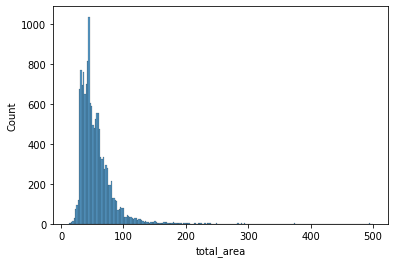

In [107]:
sb.histplot(x = 'total_area',data = data)

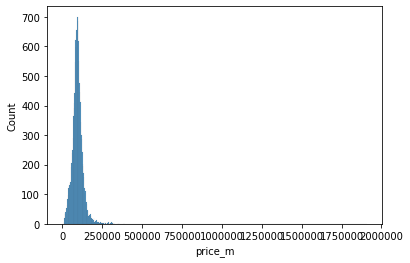

In [108]:
sb.histplot(x = 'price_m',data = data)

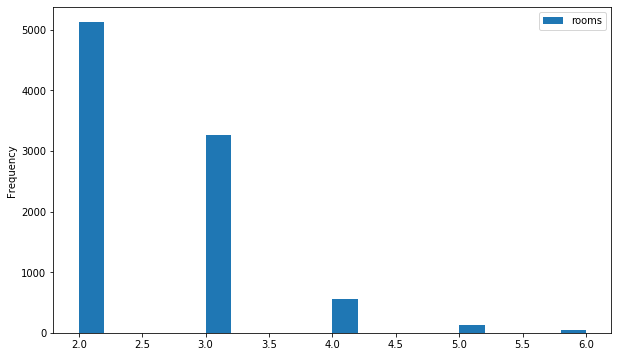

In [109]:
#Здесь тоже, может, есть нереальные значения.
data['rooms'].describe()
data.plot(y = 'rooms', kind = 'hist', range = (2,6), bins=20, figsize=(10,6))

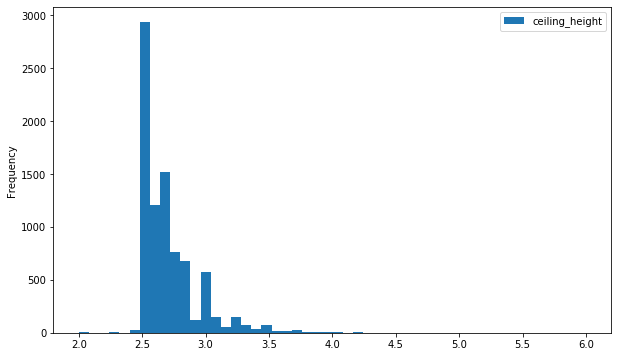

In [110]:
data['ceiling_height'].describe()
data.plot(y = 'ceiling_height', kind = 'hist', range = (2,6), bins=50, figsize=(10,6))


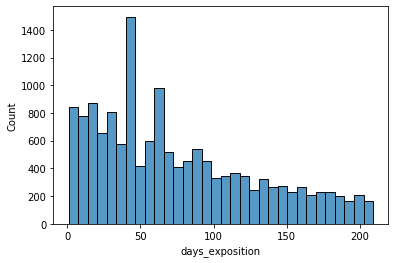

In [111]:
#Визуализация длительности пребывания объявления на сайте.
sb.histplot(x = 'days_exposition', data=data)
#Похоже, есть аномалии. Посмотрим.

Посмотрим <a href="https://yandex.ru/support/realty/paid.html">Правила ЯНедвижимости</a>

In [112]:
#Больше 210 нельзя выставлять
data = data.query('days_exposition < 180+30')

In [113]:
print('Среднее по длительности', data['days_exposition'].mean(),'\n', 'Медианное по длительности',data['days_exposition'].median())


Среднее по длительности 74.77422408546893 
 Медианное по длительности 60.0


Text(0.5, 1.0, 'Разброс длительности размещения')

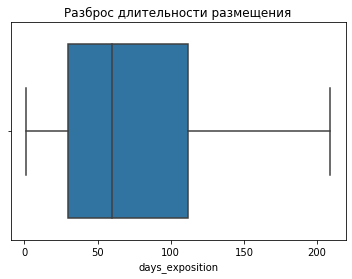

In [114]:
#data - 'days_exposition' - through its quartiles

sb.boxplot(x = 'days_exposition', data= data).set_title('Разброс длительности размещения')
#Медиана зелёненьким. Читаем: By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1)
#from the edges of the box, ending at the farthest data point within that interval.


Мне кажется, есть подход по сокращению уса за счет сокращения разницы между Q2 и Q3. Я пыталась найти способы *нормализации*, но кажется я ещё не очень уверенно использую этот термин. Короче, на данном этапе,видимо, нам разрешается откинуть какое-то максимальное значение, чтобы привести данные к чему-то более правдоподобному.

In [115]:
#Мы, конечно, посчитали медианное и среднее по длительности, но можно выбрать сразу топовые 25%.
data['days_exposition'].quantile([0.25, 0.5, 0.75])
fast_deal = data.query('0 < days_exposition <= 45')
fast_deal.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,wd_exposition,liv_total,month_exposition,yr_exposition,kitch_liv,kitch_living
count,"5,059.00","5,059.00","5,059.00","5,059.00","2,927.00","5,043.00","4,692.00","5,059.00","4,564.00","5,059.00","4,025.00","4,031.00","5,059.00","5,059.00","5,059.00","5,059.00","5,059.00","5,059.00","5,059.00","4,692.00","5,059.00","5,059.00","4,478.00","4,478.00"
mean,9.56,"5,598,654.08",53.72,1.87,2.69,11.30,30.48,6.22,9.70,0.62,"28,753.58","14,451.71",0.45,"2,160.56",0.56,"2,074.64",21.69,"98,875.63",2.61,0.56,6.84,"2,017.74",0.37,0.37
std,5.84,"11,994,827.66",28.97,0.96,0.23,6.52,18.43,4.88,4.35,0.95,"12,949.72","8,029.56",0.72,"1,201.62",0.84,"1,203.17",12.30,"46,679.25",1.79,0.10,3.54,0.74,0.19,0.18
min,0.00,"12,190.00",13.00,0.00,1.00,1.00,5.40,1.00,2.00,0.00,"6,450.00",318.00,0.00,1.00,0.00,16.00,1.00,111.83,0.00,0.07,1.00,"2,016.00",0.07,0.07
25%,5.00,"3,400,000.00",37.00,1.00,2.50,5.00,18.00,3.00,7.00,0.00,"17,674.00","10,579.00",0.00,601.50,0.00,664.00,11.00,"79,637.82",1.00,0.49,3.00,"2,017.00",0.23,0.23
50%,9.00,"4,330,000.00",46.30,2.00,2.60,9.00,28.00,5.00,9.00,0.00,"27,164.00","13,385.00",0.00,"3,000.00",0.00,"3,000.00",21.00,"95,652.17",3.00,0.56,7.00,"2,018.00",0.32,0.32
75%,14.00,"5,990,000.00",62.00,2.00,2.75,16.00,37.30,8.00,11.00,1.00,"37,593.00","16,192.50",1.00,"3,000.00",1.00,"3,000.00",32.00,"112,275.19",4.00,0.63,10.00,"2,018.00",0.50,0.50
max,50.00,"763,000,000.00",495.00,10.00,4.50,36.00,347.50,33.00,77.00,5.00,"81,607.00","62,706.00",3.00,"3,064.00",3.00,"3,000.00",44.00,"1,907,500.00",6.00,1.00,12.00,"2,019.00",1.96,1.84


**Пояснение**

5059 объявлений из 25% быстрых - то есть самые горящие объявления.

In [116]:
data['days_exposition'].quantile([0.25, 0.5, 0.75])
slow_deal = data.query('95 < days_exposition <= 180+30')
slow_deal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4581 entries, 4 to 23686
Data columns (total 30 columns):
total_images            4581 non-null int64
last_price              4581 non-null float64
total_area              4581 non-null float64
first_day_exposition    4581 non-null datetime64[ns]
rooms                   4581 non-null int64
ceiling_height          2733 non-null float64
floors_total            4559 non-null float64
living_area             4351 non-null float64
floor                   4581 non-null int64
is_apartment            4581 non-null object
studio                  4581 non-null bool
open_plan               4581 non-null bool
kitchen_area            4269 non-null float64
balcony                 4581 non-null float64
locality_name           4573 non-null object
airports_nearest        3532 non-null float64
cityCenters_nearest     3540 non-null float64
parks_around3000        4581 non-null float64
parks_nearest           4581 non-null float64
ponds_around3000        4

**Пояснение**

Четыре тысячи пятьсот восемьдесят одно объявление из 25% самых долго висящих.

**Дополнение**

Я немного изменила подход, чтобы выделить группу самых быстрых объявлений. Надеюсь, подход корректный в целом.

In [117]:
print(list(data.columns))

['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_m', 'floor_name', 'wd_exposition', 'liv_total', 'month_exposition', 'yr_exposition', 'kitch_liv', 'kitch_living']


In [118]:
#Определяющий фактор наискорейшей покупки жилья - близость к гор.центру.
factors = ['last_price', 'total_area', 'floors_total', 'living_area',\
           'cityCenters_nearest', 'price_m', 'liv_total', 'kitch_living', 'rooms', 'floor']

for factor in factors:
    print(factor, ':  ', fast_deal[factor].corr(fast_deal['days_exposition']))  

last_price :   0.0026081771931597236
total_area :   0.0021412023850624897
floors_total :   0.0018827789128518725
living_area :   0.018029776225831552
cityCenters_nearest :   0.030484314763498502
price_m :   -0.030445991265672885
liv_total :   0.0007640985145962683
kitch_living :   0.005591182198061305
rooms :   0.011897961828147214
floor :   0.010383608638780758


In [121]:
#зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
#Проблема в том, что мы сравниваем str c int.
corr_floor_price = data['floor_name'].str.get_dummies().corrwith(data['price_m'])
print(corr_floor_price)
fast_deal.head(3)

другой       0.14
первый      -0.14
последний   -0.06
dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name,wd_exposition,liv_total,month_exposition,yr_exposition,kitch_liv,kitch_living
11,9,"3,300,000.00",44.00,2018-08-27,2,nan,5.00,31.00,4,False,False,False,6.00,1.00,Ломоносов,"48,252.00","51,677.00",0.00,"3,000.00",0.00,"3,000.00",7.00,"75,000.00",другой,0,0.70,8,2018,0.19,0.19
15,16,"4,650,000.00",39.00,2017-11-18,1,nan,14.00,20.50,5,0,False,False,7.60,1.00,Санкт-Петербург,"12,900.00","14,259.00",1.00,590.00,1.00,296.00,19.00,"119,230.77",другой,5,0.53,11,2017,0.37,0.37
34,3,"3,290,000.00",33.00,2018-02-04,1,2.55,16.00,14.00,3,0,False,False,8.00,0.00,Санкт-Петербург,"13,943.00","12,739.00",0.00,"3,000.00",0.00,"3,000.00",15.00,"99,696.97",другой,6,0.42,2,2018,0.57,0.57


Верен тут ли <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html"> метод?</a>

In [125]:
# Также изучите зависимость от даты размещения: дня недели, месяца и года.
print('минимальная отрицательная зависимость', data['wd_exposition'].corr(data['price_m']))

минимальная отрицательная зависимость 0.007058963727289819


In [126]:
#Как сравнивать огурцы с носками.
print('Отрицательная минимальная корреляция от месяца публикации объявления',\
      data['month_exposition'].corr(data['price_m']))

Отрицательная минимальная корреляция от месяца публикации объявления 0.01006585278856607


In [127]:
#Как сравнивать огурцы с носками - 2.
print('Положительная минимальная корреляция от года публикации объявления',\
      data['yr_exposition'].corr(data['price_m']))

Положительная минимальная корреляция от года публикации объявления 0.033656740116113686


**Пояснение**

Мы рассмотрели различные виды корреляций. Из исходных данных расстояние до гор.центра -- самое важное.

Но в данных не выражены транспортные развязки.

In [130]:
#Топ-10 с наибольшим кол-вом предложений.
price_m_mean = data['price_m'].mean()
biggest_offer = pd.DataFrame(data.pivot_table(index = 'locality_name', values = ['price_m', 'cityCenters_nearest'],\
                                 aggfunc=['count']))
biggest_offer.columns = ['price_per_m', 'distance']
biggest_offer = biggest_offer.sort_values('price_per_m', ascending=False).head(10)
print(biggest_offer)
print('\n')
print(biggest_offer['price_per_m'].idxmax(), ':   ', biggest_offer['price_per_m'].max())
print('\n')
print(biggest_offer['price_per_m'].idxmin(axis=0), ':   ', biggest_offer['price_per_m'].min())

                   price_per_m  distance
locality_name                           
Санкт-Петербург           9820      9839
посёлок Шушары             310       313
Колпино                    236       237
посёлок Парголово          224       224
Пушкин                     196       196
Петергоф                   126       126
Сестрорецк                 106       106
Красное Село               104       105
Ломоносов                   69        70
Кронштадт                   62        63


Санкт-Петербург :    9820


Кронштадт :    62


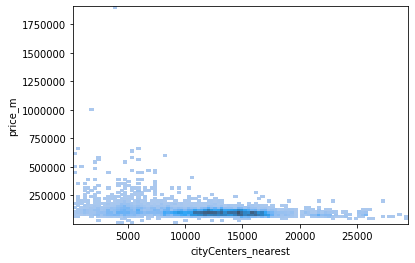

In [139]:
data_km = data.query('locality_name == "Санкт-Петербург"')
data_km.pivot_table(index = 'cityCenters_nearest', values = 'price_m', aggfunc = 'mean')
data_km.head(3)
sb.histplot(data_km, x = 'cityCenters_nearest', y = 'price_m', bins=100)

**Пояснение**
На данном этапе нам надо было визуально отсечь линией изменение в графике. Насколько мне позволяет визуальный анализ, 
дистанция в 8000 -- норм для центра Спб.

In [140]:
spb_center = pd.DataFrame(data_km.query('cityCenters_nearest < 8000'))
spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,wd_exposition,liv_total,month_exposition,yr_exposition,kitch_liv,kitch_living
count,"1,902.00","1,902.00","1,902.00","1,902.00","1,146.00","1,899.00","1,725.00","1,902.00","1,696.00","1,902.00","1,899.00","1,902.00","1,902.00","1,902.00","1,902.00","1,902.00","1,902.00","1,902.00","1,902.00","1,725.00","1,902.00","1,902.00","1,663.00","1,663.00"
mean,9.97,"12,388,420.39",82.86,2.61,3.02,7.39,48.05,4.34,12.87,0.36,"24,592.48","4,776.27",0.99,"1,341.60",1.27,"1,204.88",81.57,"137,766.71",2.61,0.58,6.73,"2,017.43",0.33,0.33
std,6.12,"22,746,886.40",51.98,1.38,0.34,4.17,32.80,3.24,7.39,0.82,"4,407.12","1,788.95",0.91,"1,228.64",1.09,"1,168.20",56.11,"80,313.83",1.75,0.12,3.40,0.76,0.23,0.22
min,0.00,"1,600,000.00",12.00,0.00,2.40,2.00,2.00,1.00,5.00,0.00,"12,388.00",208.00,0.00,9.00,0.00,22.00,3.00,"15,345.27",0.00,0.04,1.00,"2,016.00",0.04,0.04
25%,5.00,"5,990,000.00",51.00,2.00,2.75,5.00,28.30,2.00,8.40,0.00,"21,450.50","3,625.25",0.00,367.00,0.00,330.00,32.25,"99,606.28",1.00,0.51,4.00,"2,017.00",0.19,0.19
50%,9.00,"8,195,000.00",71.00,2.00,3.00,6.00,40.70,4.00,10.80,0.00,"24,327.00","4,837.00",1.00,613.00,1.00,645.00,72.00,"120,983.87",3.00,0.59,7.00,"2,017.00",0.27,0.27
75%,14.00,"12,400,000.00",97.00,3.00,3.20,9.00,57.50,5.00,15.00,0.00,"27,376.50","6,042.00",2.00,"3,000.00",2.00,"3,000.00",119.00,"149,906.17",4.00,0.66,10.00,"2,018.00",0.40,0.40
max,50.00,"763,000,000.00",500.00,19.00,4.37,27.00,347.50,25.00,100.70,5.00,"39,763.00","7,998.00",3.00,"3,000.00",3.00,"3,000.00",209.00,"1,907,500.00",6.00,0.97,12.00,"2,019.00",5.30,4.98


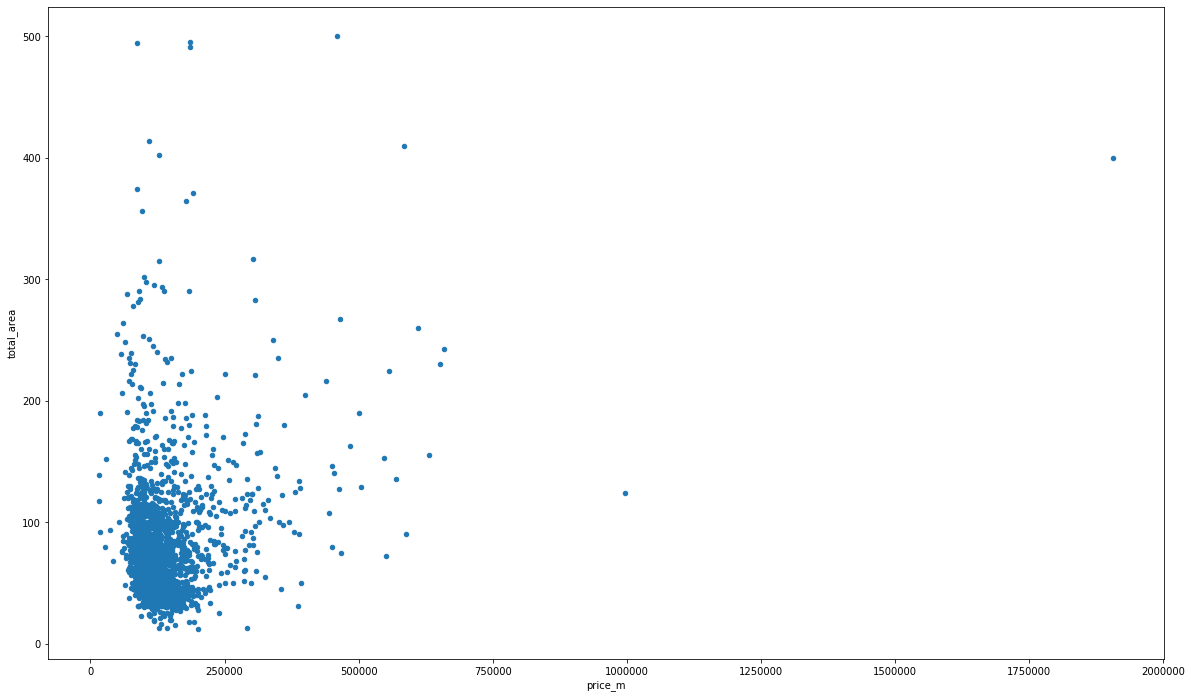

In [141]:
spb_center.plot(kind = 'scatter', y ='total_area', x = "price_m", figsize=(20,12))

**Пояснение**
Точечки! Наибольшая плотность в квадрате до 150 кв.метров и до 200 000 рублей за кв. метр. Это самые предлагаемые квартиры. Студии или квартиры около 50 кв. метров затерялись в центре синевы.

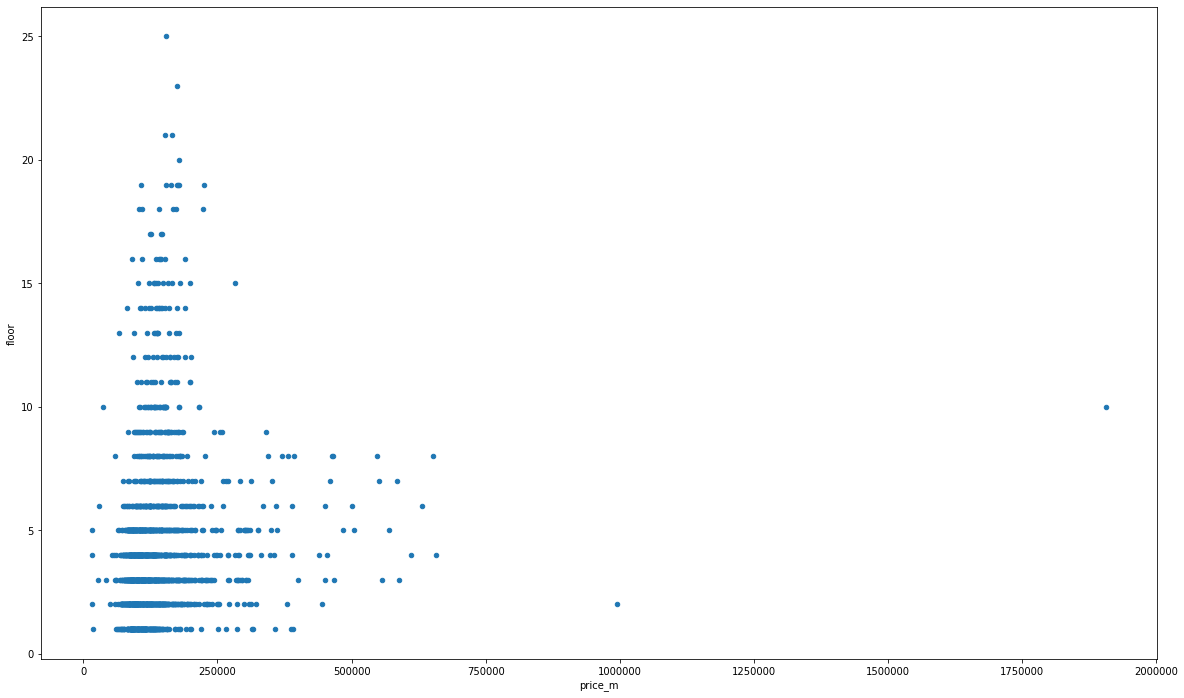

In [142]:
spb_center.plot(kind = 'scatter', y ='floor', x = "price_m", figsize=(20,12))

**Пояснение** В задании надо было нарисовать гистограммы. Но есть идеальный график-многоэтажка. Максимум предложений: квартиры до 10 этажа.

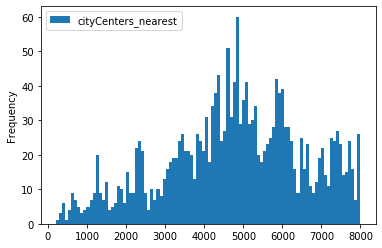

In [143]:
spb_center.plot(kind = 'hist', bins = 100, y ='cityCenters_nearest', x = "price_m")

**Пояснение**
Некрасивый график. Но зато видно, что в радиусе 5 и 6 км больше всего предложений.

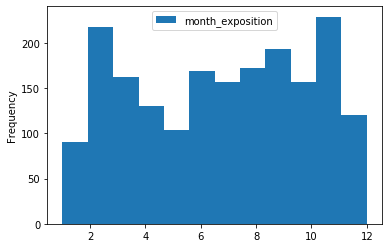

In [144]:
spb_center.plot(kind = 'hist', bins=12, y ='month_exposition', x = "price_m")

**Пояснение**
Гистограмма идеальна для отображения показателей по месяцам. Предложения растут в феврале, падают в мае, растут в ноябре.

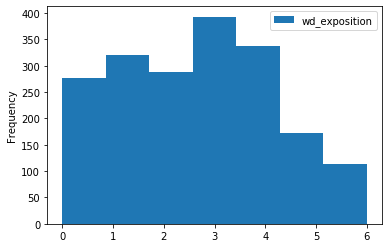

In [145]:
spb_center.plot(kind = 'hist', bins = 7, y ='wd_exposition', x = "price_m")

**Пояснение**
Гистограмма идеальна для отображения показателей и по дням недели. Предложения появляются в течение рабочей недели, четверг самый топовый день, чтобы искать свежие предложения на сайте. В выходные отдыхают, видимо, люди.

[2018, 2017, 2016, 2019, 2015]


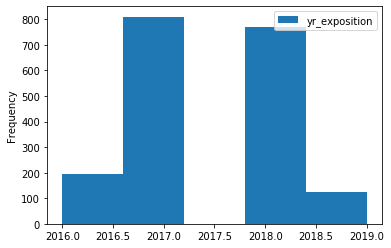

In [152]:
print(list(data['yr_exposition'].unique()))
spb_center.plot(kind = 'hist', bins = 5, y ='yr_exposition', x = "price_m")

Пояснение Гистограмма идеальна для отображения показателей -- да -- и для годов. 2017 -- год провала предложения.

In [151]:
spb_center_factors = ['rooms', 'floor', 'cityCenters_nearest', 'yr_exposition']
for i in spb_center_factors:
    print(i, ':   ', spb_center[i].corr(spb_center["price_m"]))

rooms :    0.0211480116458131
floor :    0.13393994874511841
cityCenters_nearest :    -0.0316102166351021
yr_exposition :    -0.006889972782242407


**Комментарий**
Этаж важен.  О количестве комнат не заботятся сильно. В центральной зоне расстояние уже не играет той важной роли, что по всем городам и сёлам.

### Шаг 5. Общий вывод

Проведён анализ объявлений о недвижимости по данным с сайта Яндекс.Недвижимость. Часть данных была утеряна в силу человеческого фактора.


При выявлении самых быстропродаваемых квартир мы обошлись 25% объявлений с наикратчайшим сроком пребывания на сайте. Исходим из предположения, что закрытие объявляения означает сделку.


В сегмент самых "долгих" объявлений попали объявления о 95 до 210 дней. Крайняя граница обусловлена максимальным сроком размещения, разрешённым на сайте, включая платное размещение.


Были выявлены следующие закономерности:

- Самые дорогие квартиры в СПб. Это ожидаемо - культурный центр РФ, большой город с большим предложеие работы.

- Самые дешёвые - в Кронштадте. Это, кстати, остров. Здесь роль играет транспортная недоступность.

- Удаленность от центра города является важным фактором ценообразования для данных в целом.

    - Но для выборки по более узкому радиусу ("центр" 8 км), роль играет площадь и цена за метр. Видимо, для большинства в центре транспортная проблема играет меньшую роль.

- Быстрая сделка до 45 дней. Самая долгая по данным 232 дня, что неверно: 210 дней максимум из дозволенного, даже за плату, на сайте. Хотя, может, это вкрались нерабочие дни типа НГ, майских и других праздников, хотя странно, ведь удаление объявления должно быть автоматизировано.

- Самые быстро распродаваемые квартиры в "центре": до 150 кв. м и от 200 000 руб. за кв. метр. 

- Свежие предложения на сайте появляются в течение рабочей недели. В течение года: в феврале (месяц после праздников) и в ноябре (перед длинными каникулами) больше всего предложений. Май - провальный, мб в силу майских праздников.

- Минимум в "центре" предложение достигло в 2017 г. Одно из предположений исходя из общероссийской ситуации в том году: экономический кризис. Но это неточно, лишь канва событий.

**Минусы анализа**:
Неуверенно нормирую данные (уместно ли вообще такое выражение?) и не всегда могу аргументировать, как нашла аномалию на исключение. Не знаю толком, что такое выбросы.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения **кроме столбца с удалённостью от аэропортов**
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x] есть общий вывод

**Спасибо за ревью**